# Problem 1:

### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
###Data Ingestion:

In [5]:
import numpy as np
import pandas as pd
import os
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
import warnings 
warnings.filterwarnings( "ignore")

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [7]:
Ed= pd.read_excel('Election.xlsx')

In [8]:
Ed

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [9]:
Ed.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [10]:
Ed.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [11]:
Ed.shape

(1525, 9)

In [12]:
Ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [13]:
Ed.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [14]:
Ed.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [15]:
Ed.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [16]:
Ed.skew(axis=0,skipna=True)

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [17]:
Ed.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [18]:
Ed.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [19]:
dups = Ed.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Ed[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [20]:
Ed.drop_duplicates(inplace=True)

In [21]:
Ed.shape

(1517, 9)

In [22]:
Ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [23]:
cat=[]
num=[]
for i in Ed.columns:
    if Ed[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


### unique values for categorical variables

In [26]:
for column in Ed.columns:
    if Ed[column].dtype == 'object':
        print(column.upper(),': ',Ed[column].nunique())
        print(Ed[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




### Outlier Check

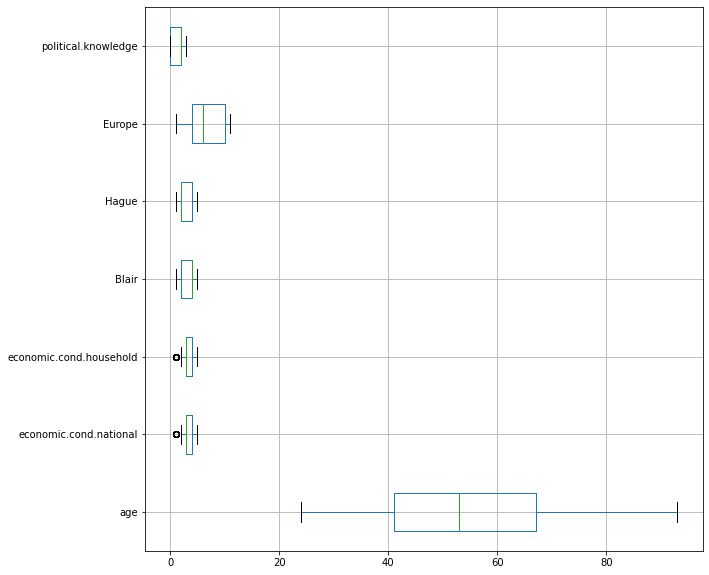

In [27]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
Ed[num].boxplot(vert=0)
plt.show()

### outlier treatment

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
var = ["economic.cond.national",'economic.cond.household']
lr,ur=remove_outlier(Ed[var])
Ed[var]=np.where(Ed[var]>ur,ur,Ed[var])
Ed[var]=np.where(Ed[var]<lr,lr,Ed[var])

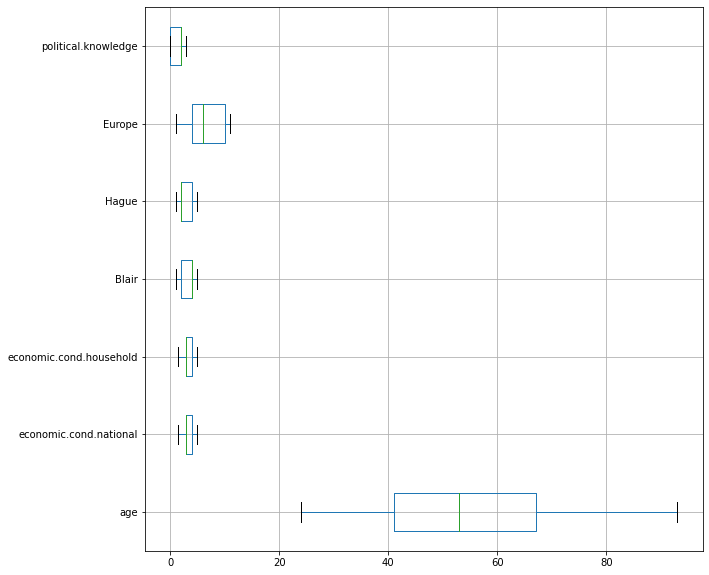

In [30]:
plt.figure(figsize=(10,10))
Ed[num].boxplot(vert=0);

In [31]:
Ed.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.257416,3.159196,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.853647,0.886279,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


### Univaraite Analysis

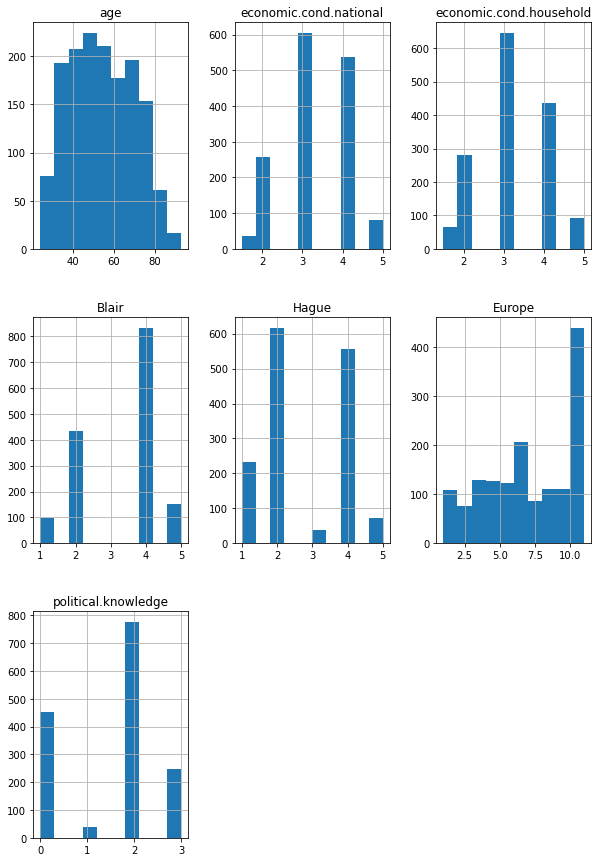

In [33]:
Ed.hist(figsize=(10,15));

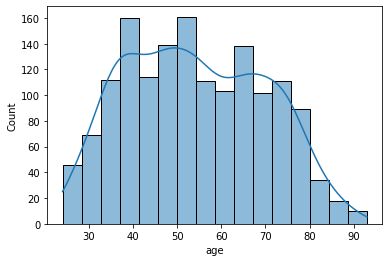

In [34]:
sns.histplot(data=Ed,x='age',kde=True);

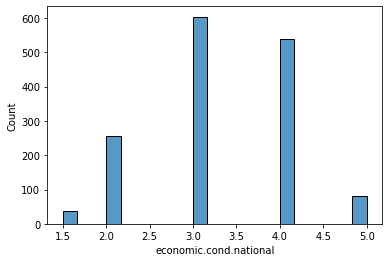

In [35]:
sns.histplot(data=Ed,x='economic.cond.national');

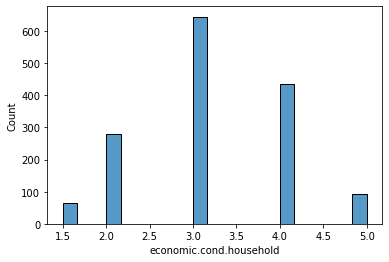

In [36]:
sns.histplot(data=Ed,x='economic.cond.household');

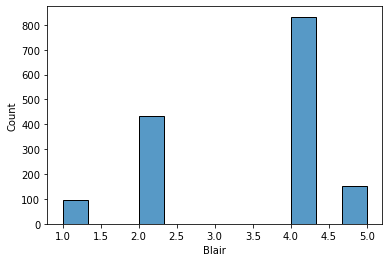

In [37]:
sns.histplot(data=Ed,x='Blair');

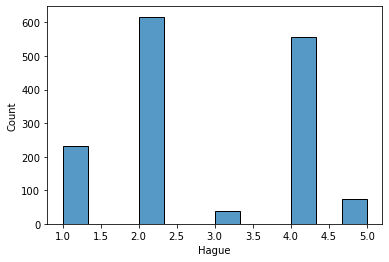

In [38]:
sns.histplot(data=Ed,x='Hague');

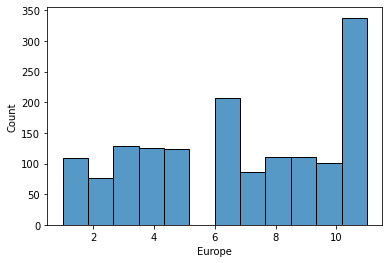

In [39]:
sns.histplot(data=Ed,x='Europe');

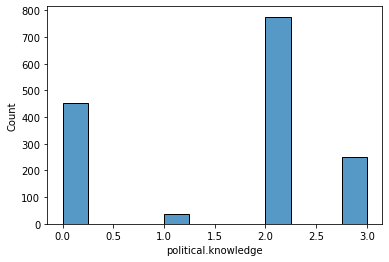

In [40]:
sns.histplot(data=Ed,x='political.knowledge');

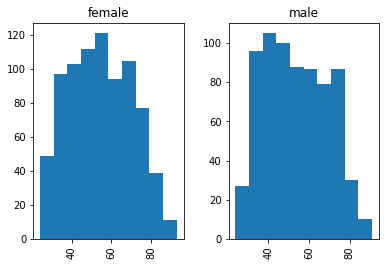

In [41]:
Ed.hist(by='gender',column='age');

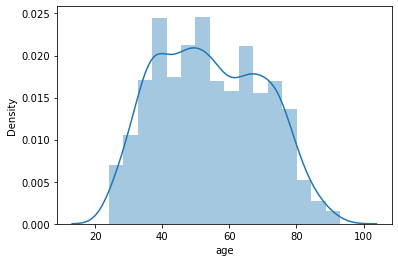

In [42]:
sns.distplot(Ed['age']);

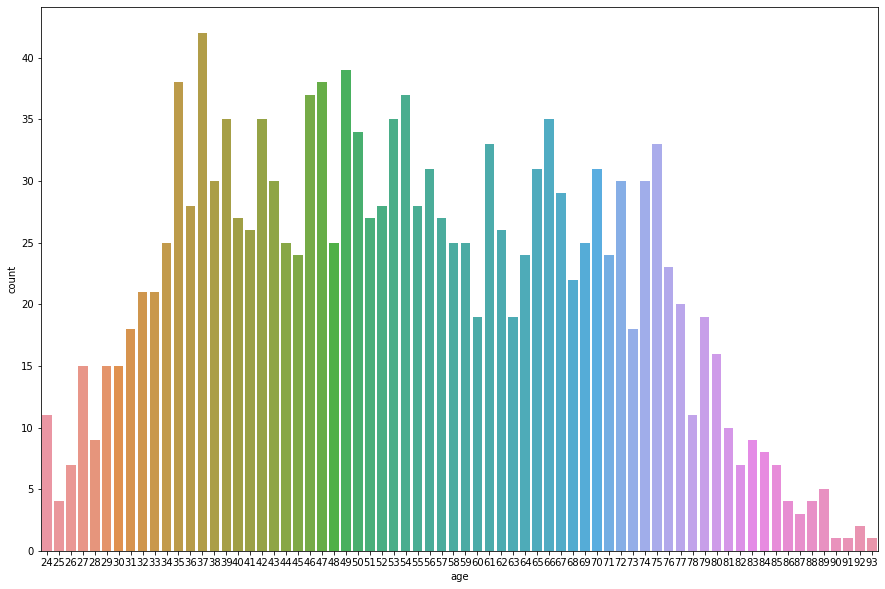

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(data=Ed,x='age');

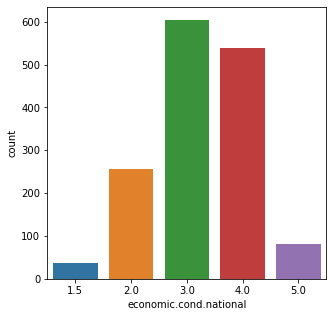

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(data=Ed,x='economic.cond.national');

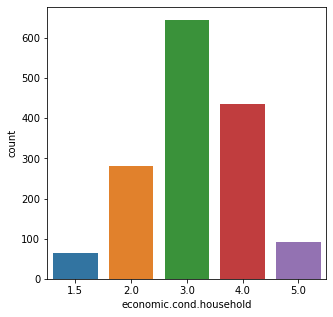

In [45]:
plt.figure(figsize=(5,5))
sns.countplot(data=Ed,x='economic.cond.household');

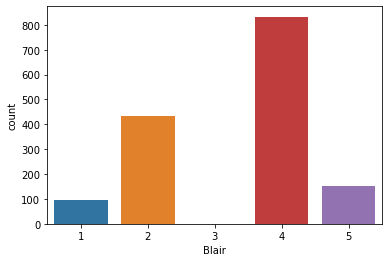

In [46]:
sns.countplot(data=Ed,x='Blair');

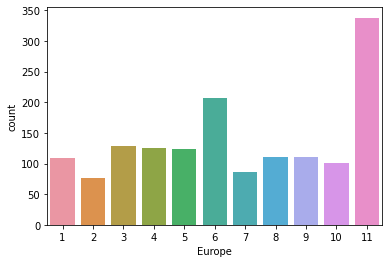

In [47]:
sns.countplot(data=Ed,x='Europe');

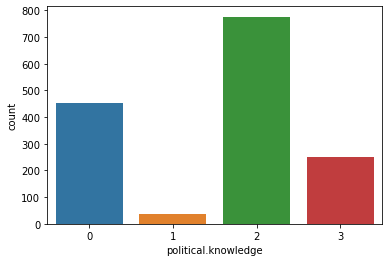

In [48]:
sns.countplot(data=Ed,x='political.knowledge');

In [49]:
Ed.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3.0,3.0,4,1,2,2,female
1,Labour,36,4.0,4.0,4,4,5,2,male
2,Labour,35,4.0,4.0,5,2,3,2,male
3,Labour,24,4.0,2.0,2,1,4,0,female
4,Labour,41,2.0,2.0,1,1,6,2,male


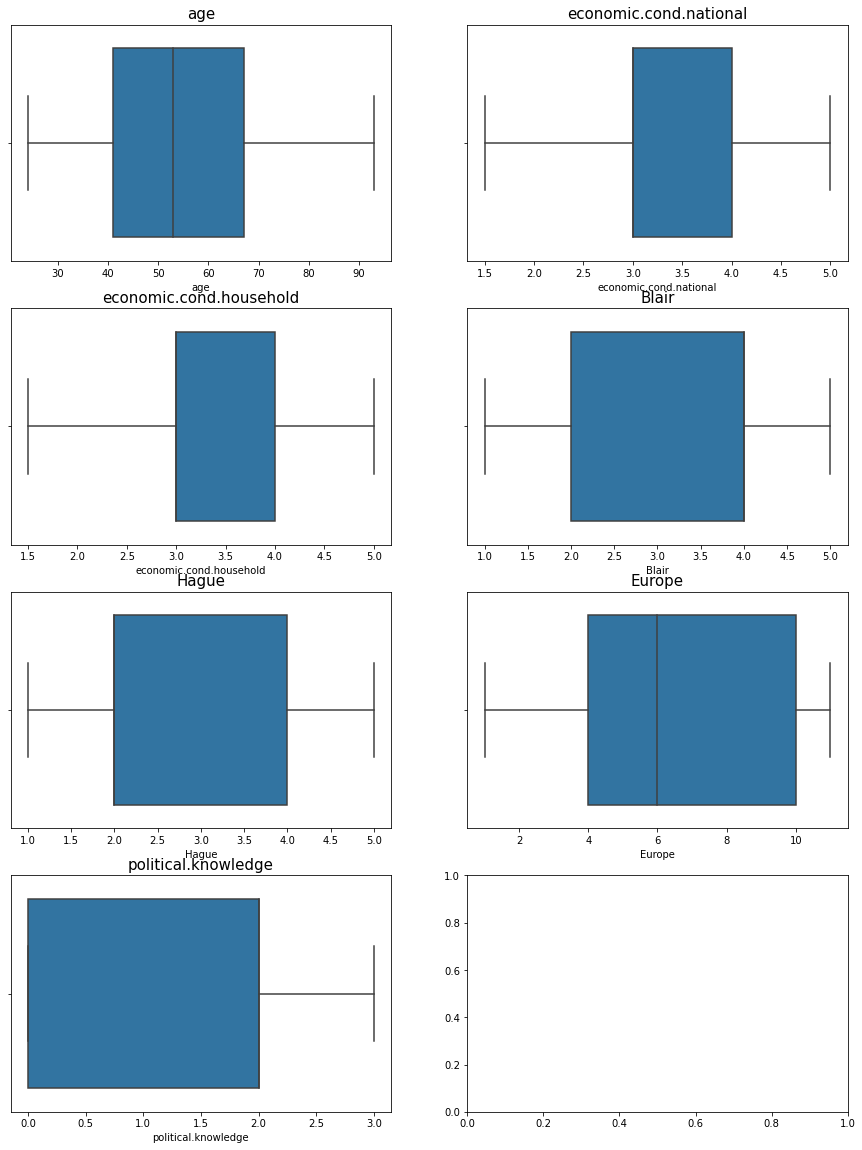

In [50]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a=sns.boxplot(Ed['age'] ,ax=axes[0][0])
a.set_title("age",fontsize=15)
a=sns.boxplot(Ed['economic.cond.national'],ax=axes[0][1])
a.set_title("economic.cond.national",fontsize=15)
a=sns.boxplot(Ed['economic.cond.household'] , ax=axes[1][0])
a.set_title("economic.cond.household",fontsize=15)
a=sns.boxplot(Ed['Blair'] ,ax=axes[1][1])
a.set_title("Blair",fontsize=15)
a=sns.boxplot(Ed['Hague'] ,ax=axes[2][0])
a.set_title("Hague",fontsize=15)
a=sns.boxplot(Ed['Europe'] ,ax=axes[2][1])
a.set_title("Europe",fontsize=15)
a=sns.boxplot(Ed['political.knowledge'] ,ax=axes[3][0])
a.set_title("political.knowledge",fontsize=15)
plt.show()

### Bivariate Analysis

In [51]:
corr = Ed.corr(method='pearson')
corr

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273
economic.cond.household,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521
Blair,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000


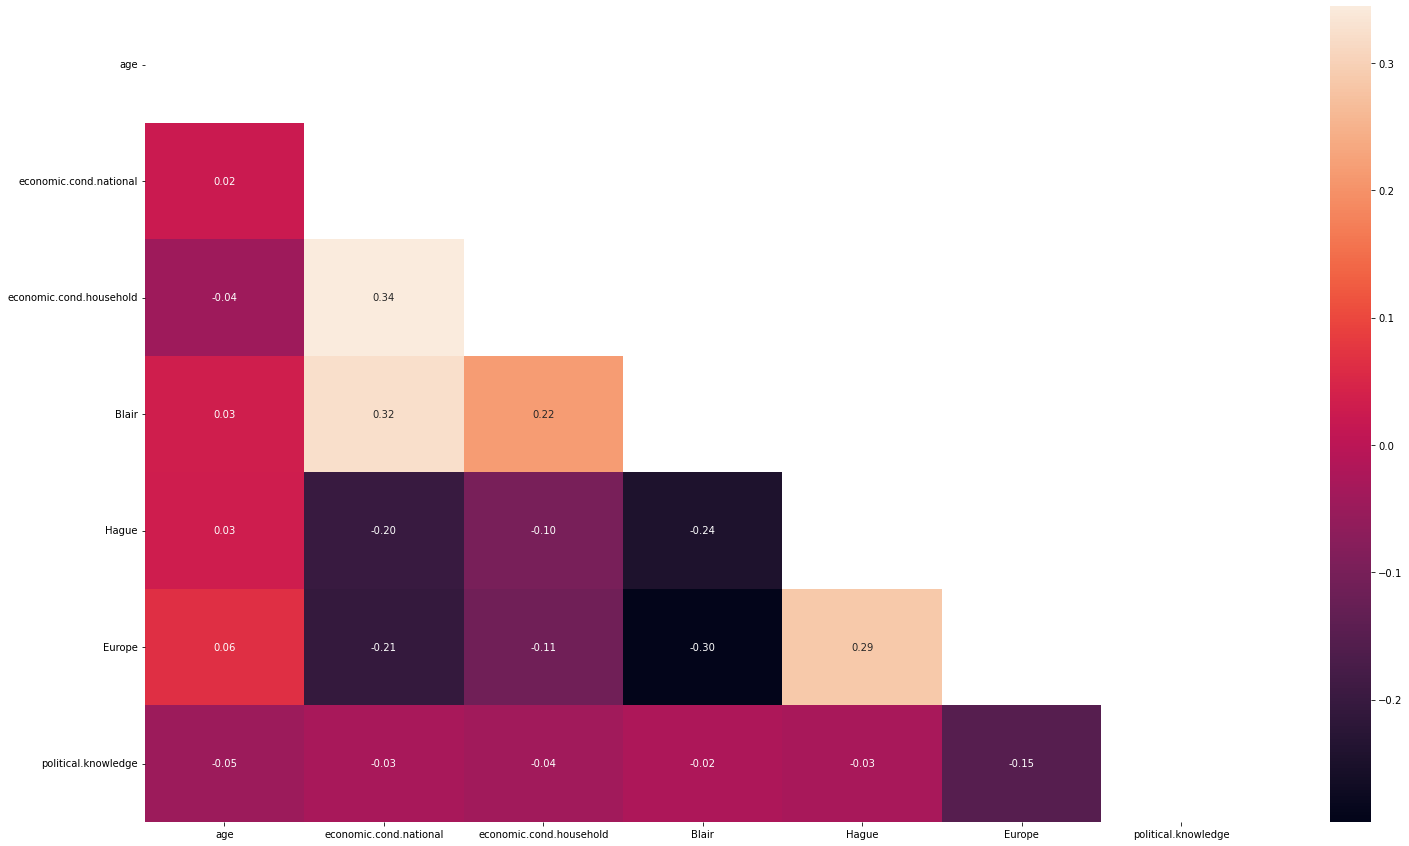

In [52]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(Ed.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

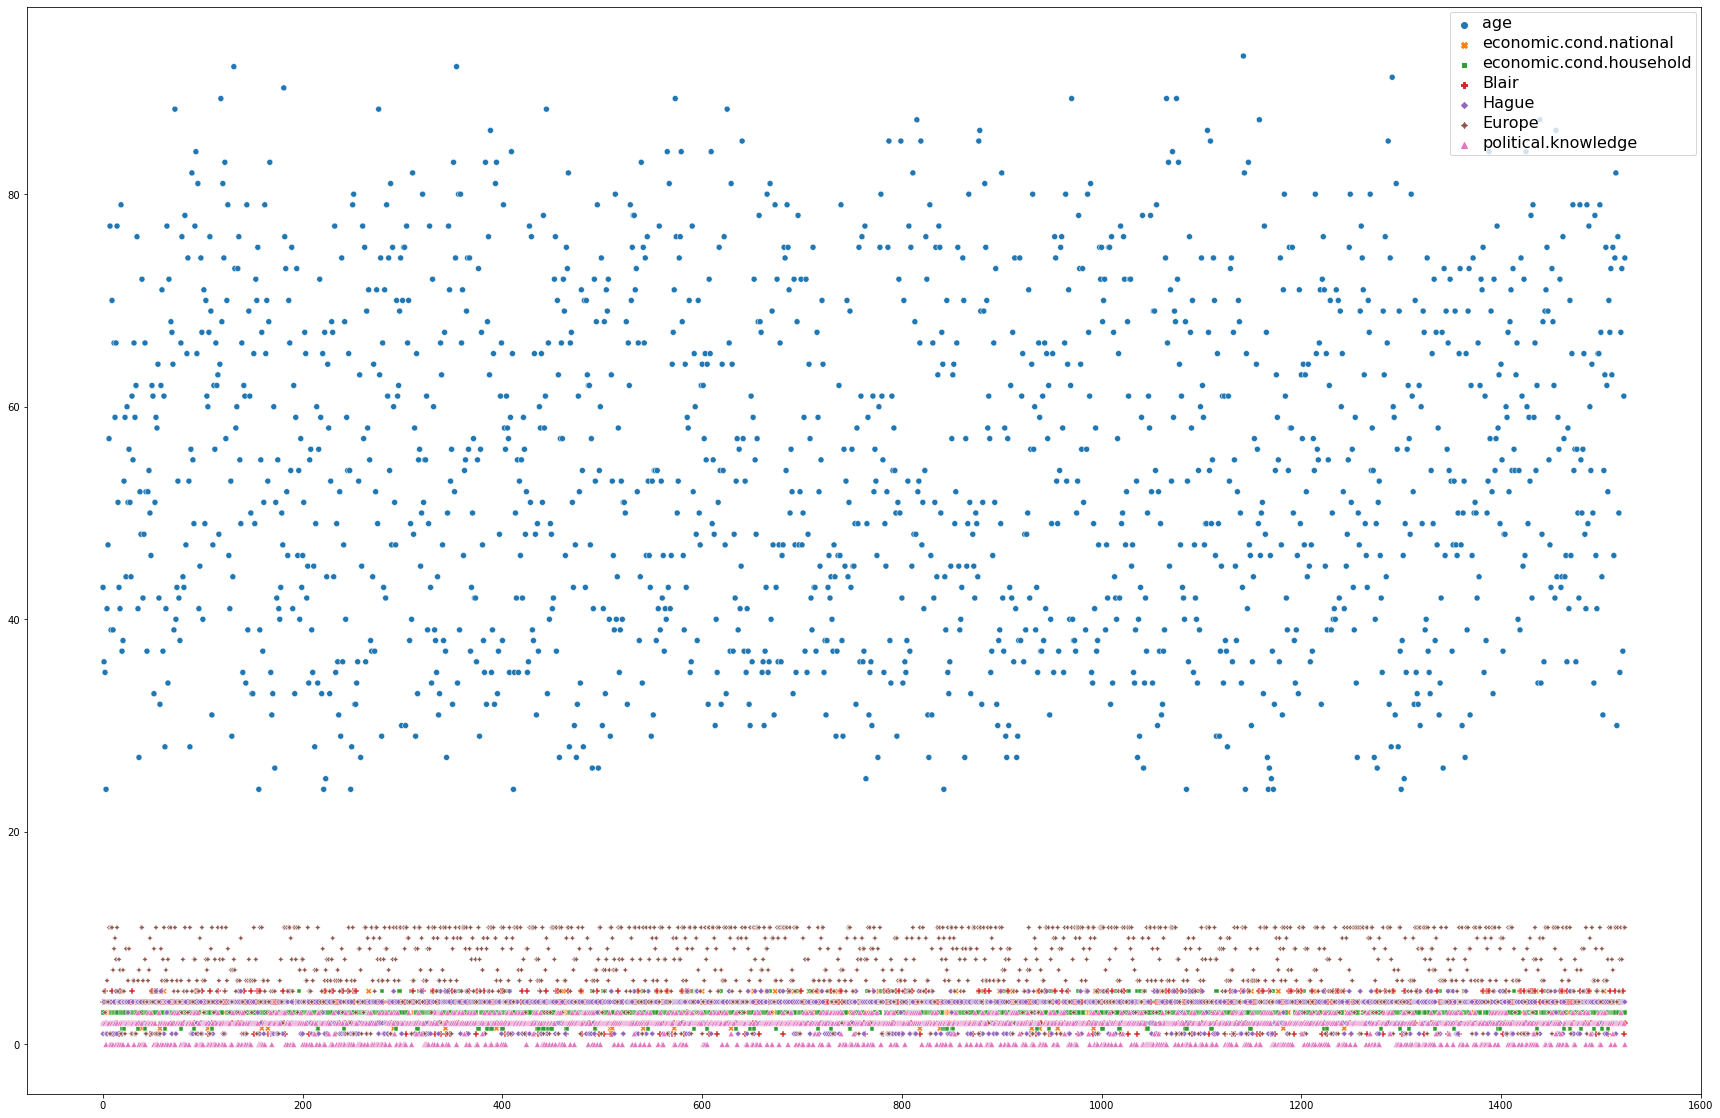

In [53]:
plt.figure(figsize=(30 ,20))
gf=sns.scatterplot(data=Ed)
plt.setp(gf.get_legend().get_texts(),fontsize='16')
plt.ticklabel_format(style='plain');

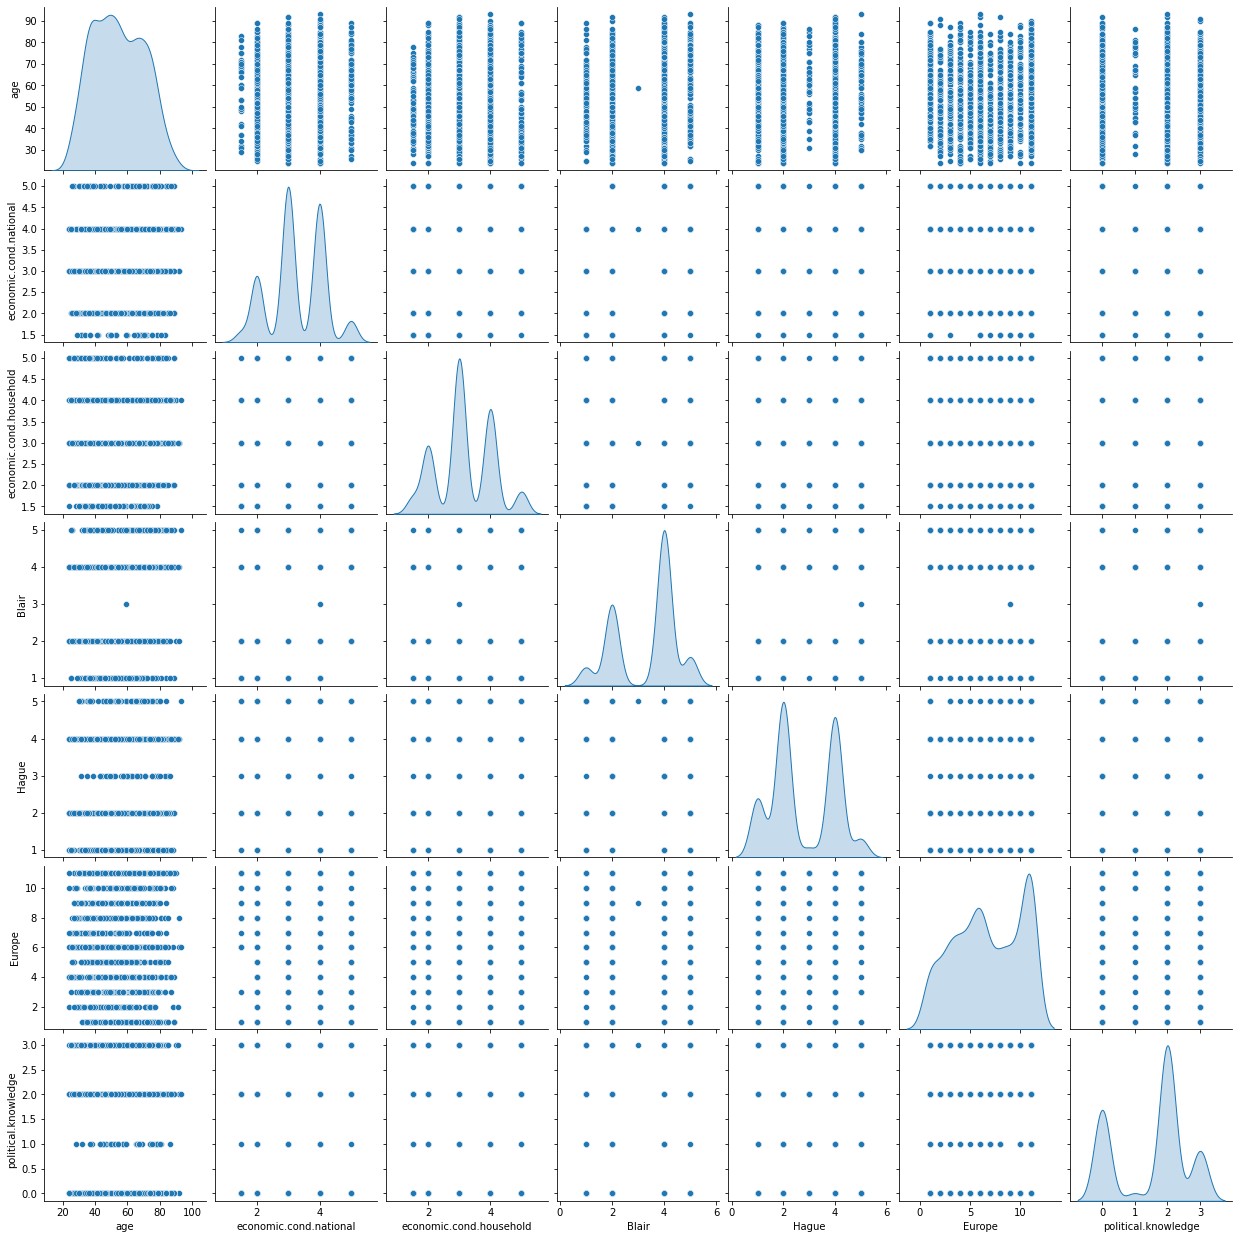

In [54]:
sns.pairplot(Ed, diag_kind='kde')
plt.show()

In [55]:
round(corr,2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.00,0.02,-0.04,0.03,0.03,0.06,-0.05
economic.cond.national,0.02,1.00,0.34,0.32,-0.20,-0.21,-0.03
economic.cond.household,-0.04,0.34,1.00,0.22,-0.10,-0.11,-0.04
Blair,0.03,0.32,0.22,1.00,-0.24,-0.30,-0.02
Hague,0.03,-0.20,-0.10,-0.24,1.00,0.29,-0.03
Europe,0.06,-0.21,-0.11,-0.30,0.29,1.00,-0.15
political.knowledge,-0.05,-0.03,-0.04,-0.02,-0.03,-0.15,1.00


In [56]:
Ed.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3.0,3.0,4,1,2,2,female
1,Labour,36,4.0,4.0,4,4,5,2,male
2,Labour,35,4.0,4.0,5,2,3,2,male
3,Labour,24,4.0,2.0,2,1,4,0,female
4,Labour,41,2.0,2.0,1,1,6,2,male


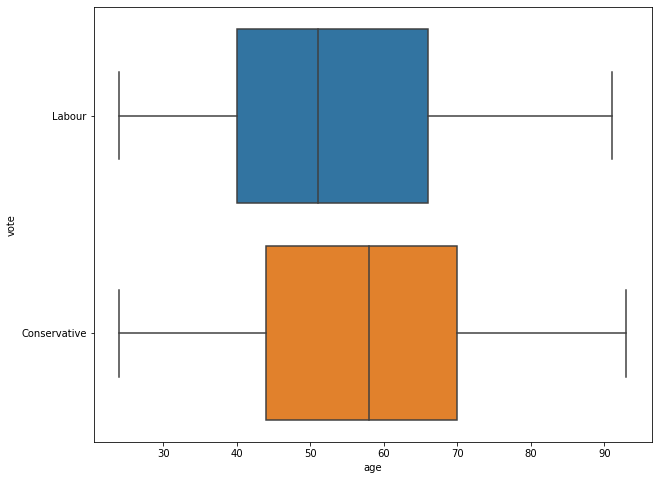

In [57]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='age',y='vote');

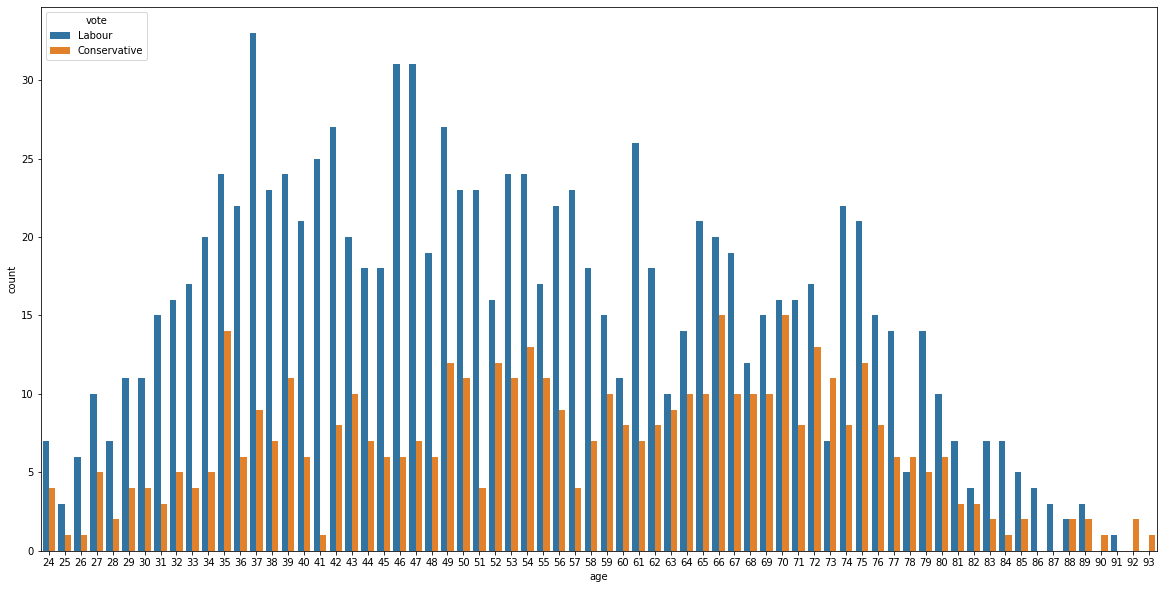

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(data=Ed,x='age',hue='vote');

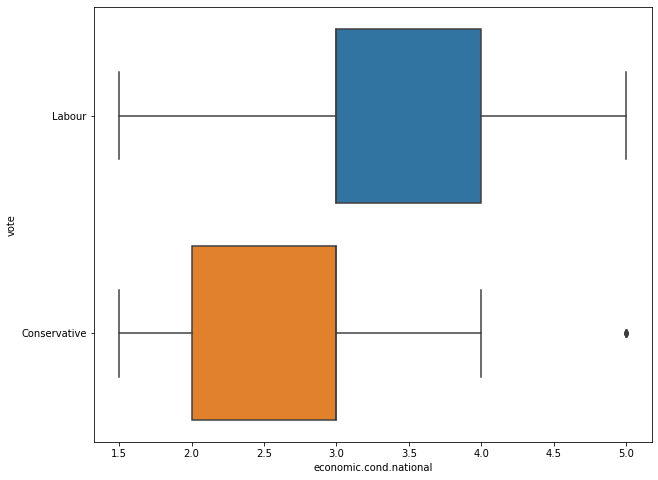

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='economic.cond.national',y='vote');

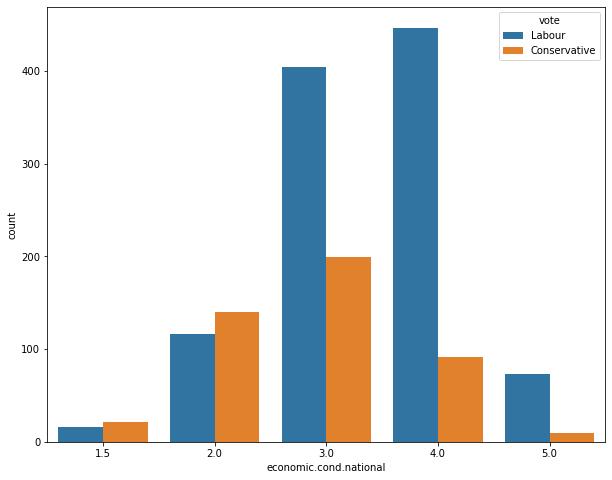

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='economic.cond.national',hue='vote');

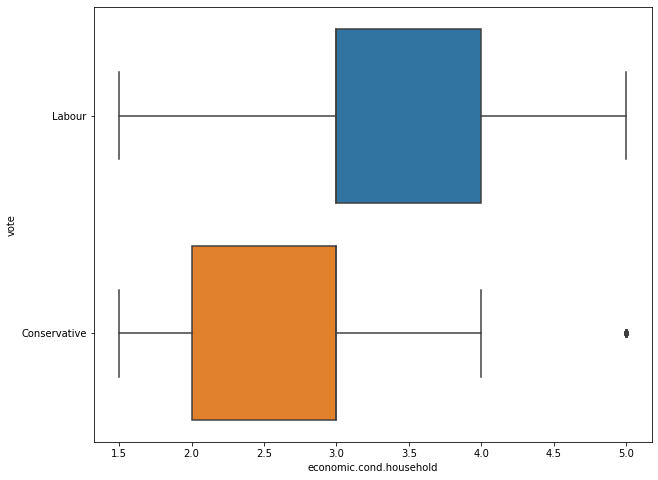

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='economic.cond.household',y='vote');

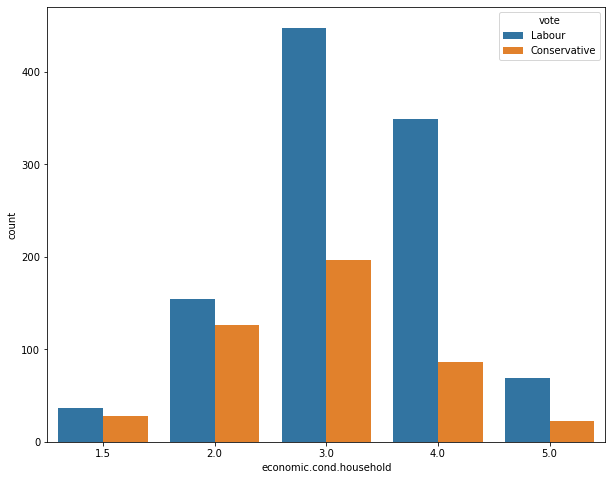

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='economic.cond.household',hue='vote');

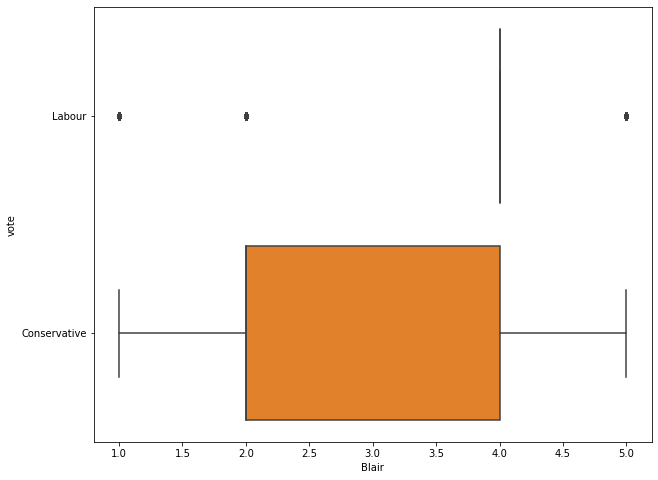

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='Blair',y='vote');

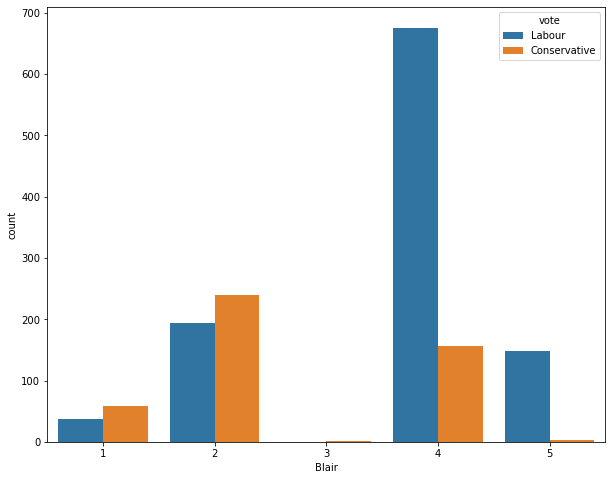

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='Blair',hue='vote');

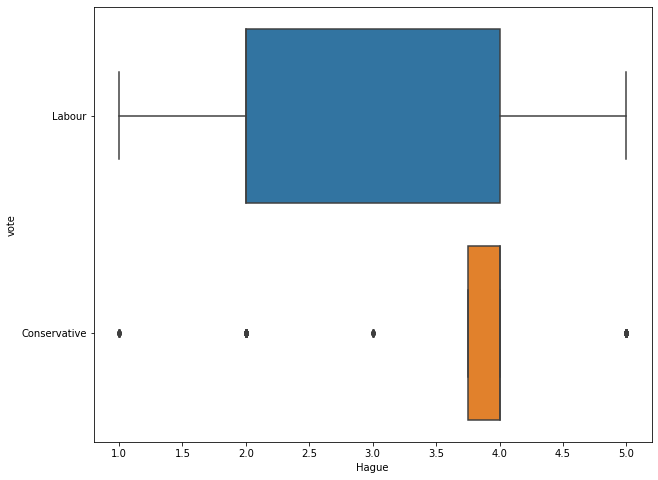

In [65]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='Hague',y='vote');

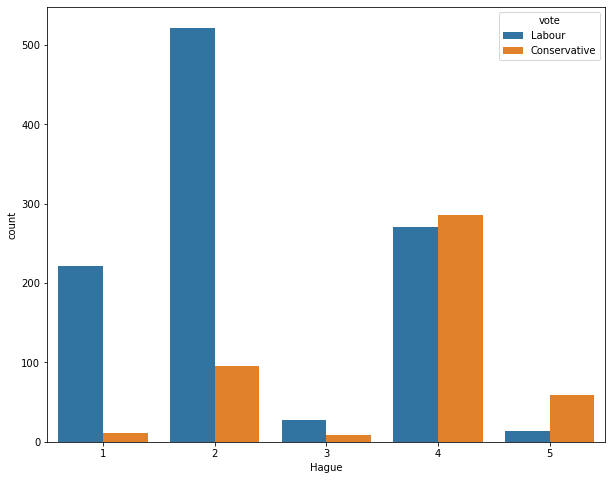

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='Hague',hue='vote');

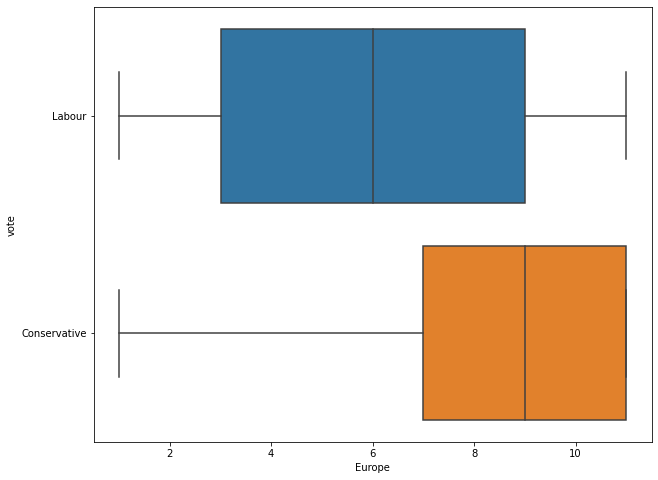

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='Europe',y='vote');

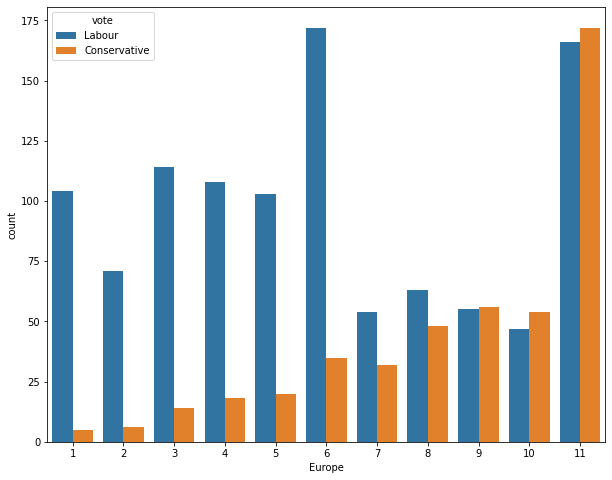

In [68]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='Europe',hue='vote');

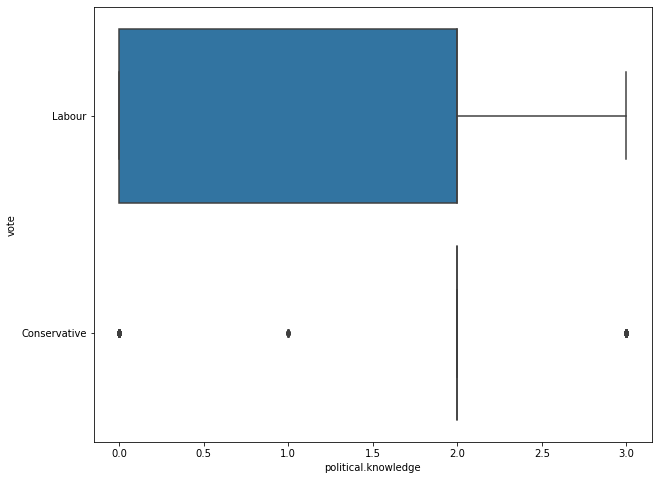

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(data=Ed,x='political.knowledge',y='vote');

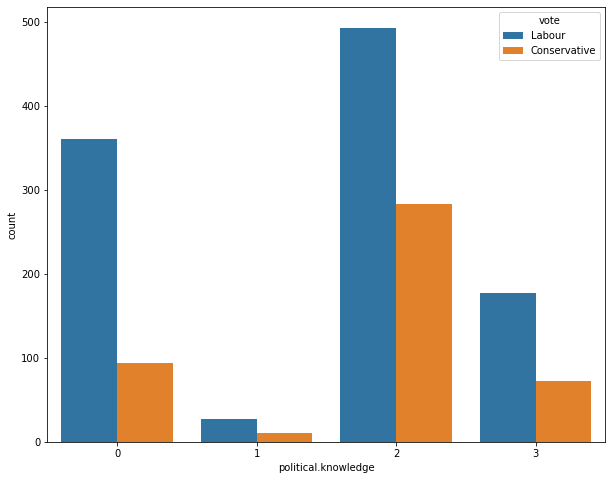

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='political.knowledge',hue='vote');

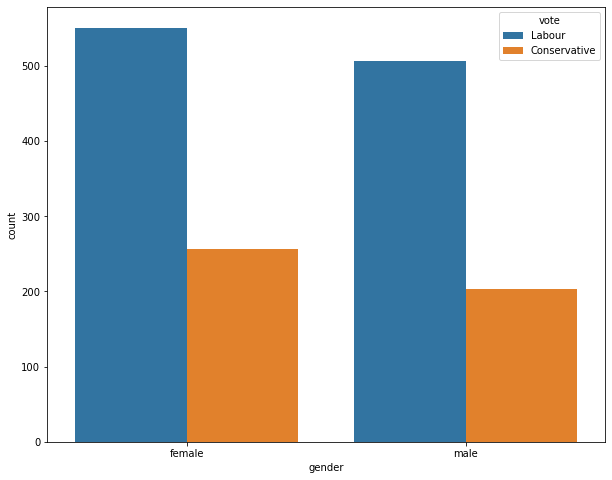

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(data=Ed,x='gender',hue='vote');

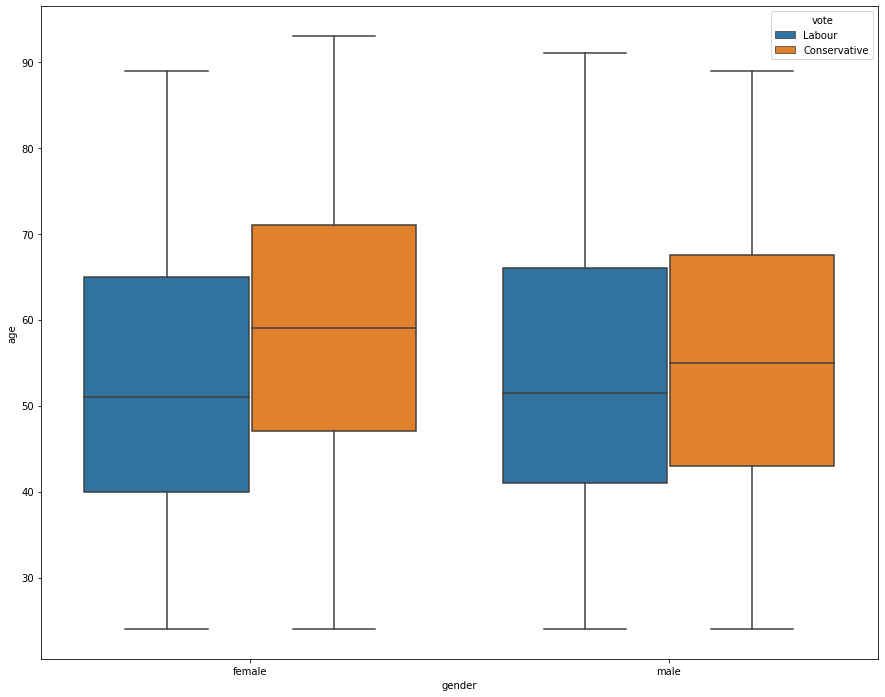

In [72]:
plt.figure(figsize=(15,12))
sns.boxplot(data=Ed,x='gender',y='age',hue='vote');

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

### yes, scaling is necessary here

In [81]:
from scipy.stats import zscore

In [82]:
scaled_df=Ed[num].apply(zscore)
scaled_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832


In [83]:
Ed[num].head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3.0,3.0,4,1,2,2
1,36,4.0,4.0,4,4,5,2
2,35,4.0,4.0,5,2,3,2
3,24,4.0,2.0,2,1,4,0
4,41,2.0,2.0,1,1,6,2


In [84]:
scaled_df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.917458e-17,-5.848980e-16,-2.304609e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.059394e+00,-1.872709e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00
25%,-8.435773e-01,-3.016479e-01,-1.796818e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00
50%,-7.907881e-02,-3.016479e-01,-1.796818e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01
75%,8.128361e-01,8.701828e-01,9.490028e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01
max,2.469250e+00,2.042014e+00,2.077687e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00


In [85]:
Ed.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.257416,3.159196,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.853647,0.886279,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


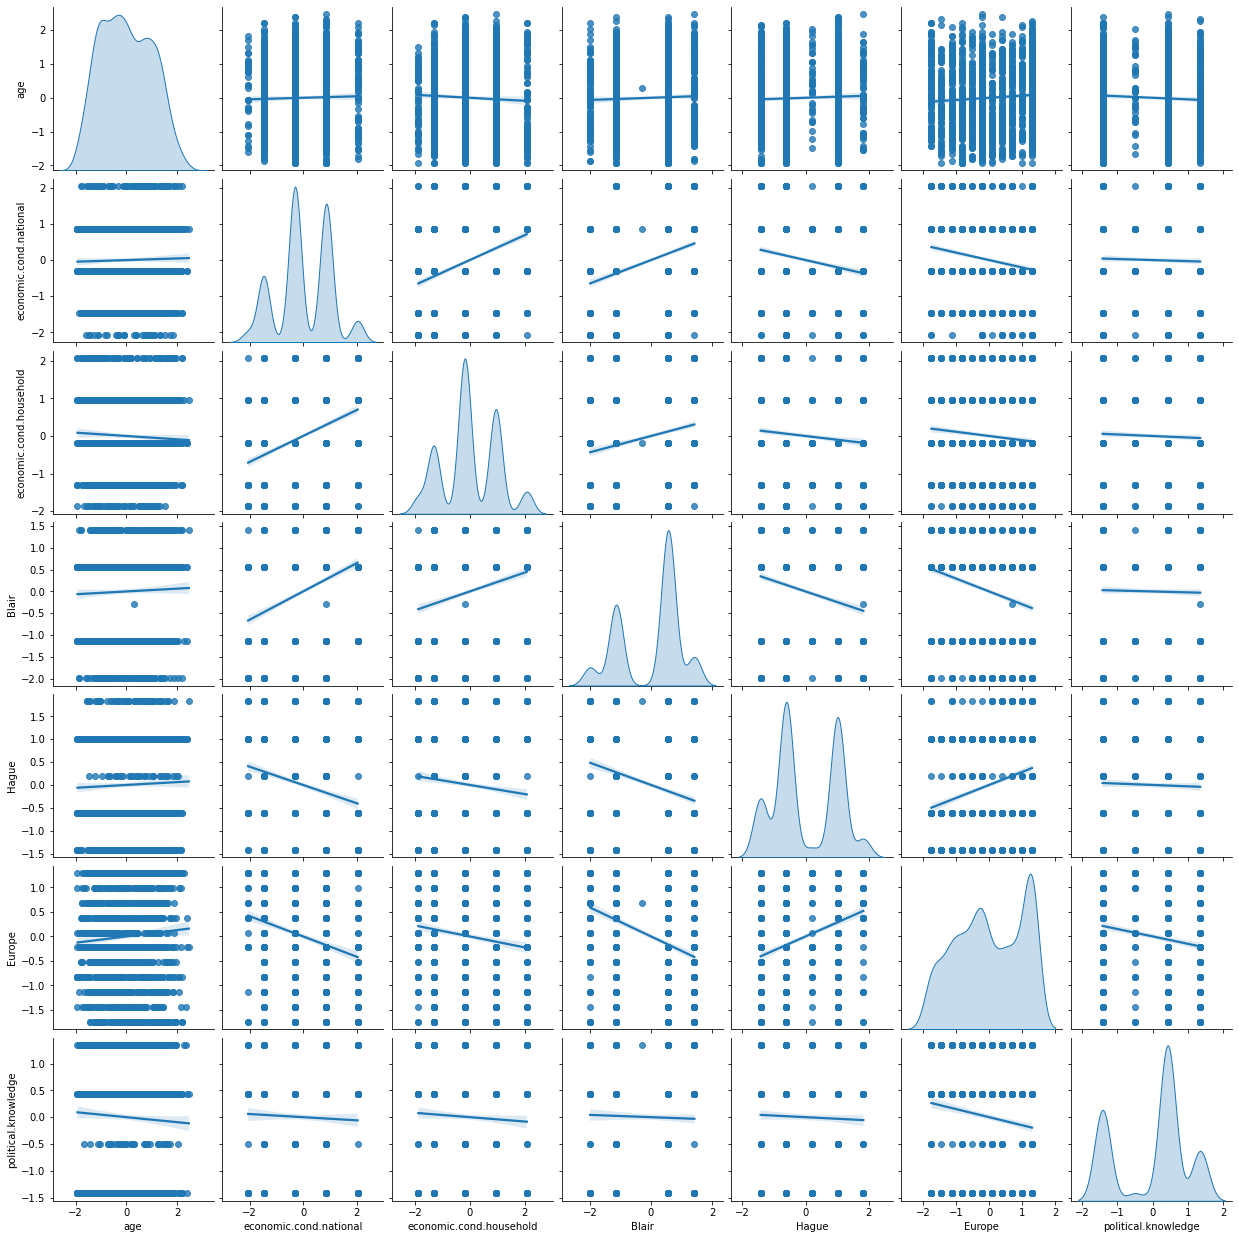

In [86]:
sns.pairplot(scaled_df,kind='reg',diag_kind='kde')  
plt.show();

In [87]:
scaled_df[['gender','vote']]=Ed[['gender','vote']]
scaled_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,female,Labour
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,male,Labour
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,male,Labour
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,female,Labour
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,male,Labour


In [88]:
new_df = pd.get_dummies(scaled_df,drop_first=True)
new_df

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,0,1
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1,1
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1,1
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,0,1
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1,1
...,...,...,...,...,...,...,...,...,...
1520,0.812836,2.042014,-0.179682,-1.137217,1.014951,1.291625,1.346290,1,0
1521,1.195085,-1.473479,-1.308366,0.565802,1.014951,0.381971,0.423832,1,0
1522,-1.098410,-0.301648,-0.179682,1.417312,1.014951,-1.437338,0.423832,1,1
1523,0.430587,-0.301648,-0.179682,-1.988727,1.014951,1.291625,0.423832,1,0


## Train and Split

In [89]:
X = new_df.drop('vote_Labour', axis=1)

y = new_df[['vote_Labour']]

In [90]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1


In [91]:
X.shape

(1517, 8)

In [92]:
y.shape

(1517, 1)

In [93]:
y.head()

,vote_Labour
0,1
1,1
2,1
3,1
4,1


In [94]:
y.tail()

,vote_Labour
1520,0
1521,0
1522,1
1523,0
1524,0


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1) #70 train, 30 test

In [96]:
y_train.value_counts(normalize = True)

vote_Labour
1              0.71065
0              0.28935
dtype: float64

In [97]:
y_test.value_counts(normalize = True)

vote_Labour
1              0.664474
0              0.335526
dtype: float64

In [98]:
# Checking on the split
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


### Modeling:

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

***Logistic Regression Model***

In [99]:
# For Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#For Model Performance and Tuning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.preprocessing import scale

In [100]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.2s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

## Predicting on Training and Test dataset

In [101]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Getting the Predicted Classes and Probs

In [102]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


## Model Evaluation

In [103]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

In [104]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8289473684210527

In [105]:
# Performance measures using Classification report on training set
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [106]:
# Performance measures using Classification report on Test set
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



# LDA Model

In [107]:
#Build LDA Model
lda = LinearDiscriminantAnalysis()
model=lda.fit(X_train,y_train)

## Generate Coefficients and intercept for the Linear Discriminant Function

In [108]:
#intercept value
lda.intercept_ 

array([1.42211224])

In [109]:
#coefficients for the Linear Discriminant Function
lda.coef_

array([[-0.31681002,  0.54029753,  0.05923211,  0.87064732, -1.14244856,
        -0.73766111, -0.46483709,  0.14765058]])

In [110]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_male'],
      dtype='object')

In [111]:
## Getting the equation
round(pd.DataFrame(lda.coef_.reshape(1,-1),columns=X_train.columns),2).T

,0
age,-0.32
economic.cond.national,0.54
economic.cond.household,0.06
Blair,0.87
Hague,-1.14
Europe,-0.74
political.knowledge,-0.46
gender_male,0.15


In [112]:
# Writing the equation
for i in range(0,X_train.shape[1]):
    print('{} * {}'.format(np.round(lda.coef_[0][i],2),X_train.columns[i]),end=' (+) ')

-0.32 * age (+) 0.54 * economic.cond.national (+) 0.06 * economic.cond.household (+) 0.87 * Blair (+) -1.14 * Hague (+) -0.74 * Europe (+) -0.46 * political.knowledge (+) 0.15 * gender_male (+) 

In [113]:
a=lda.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.32,  0.54,  0.06,  0.87, -1.14, -0.74, -0.46,  0.15]])

In [114]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [115]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [116]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [117]:
pred_prob_train[:,1]

array([0.04973366, 0.92243861, 0.69491333, ..., 0.77989739, 0.78940481,
       0.98130104])

In [113]:
pred_prob_test[:,1]

array([0.05658324, 0.25694399, 0.65956709, 0.50345051, 0.85905102,
       0.03561771, 0.99480505, 0.98904224, 0.86466099, 0.96911471,
       0.93281557, 0.6222046 , 0.95877636, 0.97891767, 0.90539313,
       0.92352914, 0.97049137, 0.75660973, 0.95899474, 0.87309412,
       0.91779551, 0.15521565, 0.73312445, 0.95072767, 0.74216177,
       0.80395473, 0.02169057, 0.08464555, 0.90233864, 0.89598175,
       0.86699643, 0.36474095, 0.42346396, 0.96153482, 0.40634554,
       0.5840899 , 0.9968671 , 0.02667209, 0.98588261, 0.99287286,
       0.10748219, 0.91812783, 0.29571841, 0.26539186, 0.33563996,
       0.98470918, 0.85925281, 0.98605613, 0.99546399, 0.08308564,
       0.66197472, 0.94214874, 0.4417191 , 0.94017363, 0.02230861,
       0.91971214, 0.89318742, 0.93831296, 0.74549587, 0.96602915,
       0.57179947, 0.73888458, 0.94515838, 0.84455986, 0.13213942,
       0.49671622, 0.93514794, 0.95429696, 0.97533242, 0.98904224,
       0.99057617, 0.05727821, 0.7579215 , 0.9839465 , 0.21459

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

**KNN Model**

In [119]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [120]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8567389255419415
[[218  89]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [121]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[107  46]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       153
           1       0.85      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.82       456



**Default value n_neighbors=5, lets check the performance for K=7**

In [122]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [123]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8520263901979265
[[216  91]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [124]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[110  43]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       153
           1       0.86      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



**Gaussian Naive Bayes**

In [127]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
model_score = model.score(X_train, y_train)                   
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print('\n',model_score)

GaussianNB()
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

[[112  41]
 [ 40 263]]

 0.8341187558906692


In [128]:
model.score(X_train, y_train)

0.8341187558906692

In [129]:
model.score(X_test, y_test)

0.8223684210526315

### K-fold Validation

In [130]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(model,X_train, y_train, cv =10)
print("Cross Validation Score:", scores,scores)
print("Average Score:", np.average(scores))

Cross Validation Score: [0.79439252 0.78301887 0.8490566  0.83962264 0.90566038 0.85849057
 0.80188679 0.82075472 0.81132075 0.82075472] [0.79439252 0.78301887 0.8490566  0.83962264 0.90566038 0.85849057
 0.80188679 0.82075472 0.81132075 0.82075472]
Average Score: 0.8284958561100334


### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

**Random Forest**

In [131]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [132]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [133]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



**Bagging**

In [134]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
Rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=Rf,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [135]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [136]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



**Ada Boost**

In [137]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ada_boost_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [138]:
## Performance Matrix on train data set
y_train_predict = ada_boost_model.predict(X_train)
model_score = ada_boost_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [139]:
## Performance Matrix on test data set
y_test_predict = ada_boost_model.predict(X_test)
model_score = ada_boost_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



**Gradient Boosting**

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_model = GradientBoostingClassifier(random_state=1)
grad_boost_model = grad_boost_model.fit(X_train, y_train)

In [141]:
## Performance Matrix on train data set
y_train_predict = grad_boost_model.predict(X_train)
model_score = grad_boost_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [142]:
## Performance Matrix on test data set
y_test_predict = grad_boost_model.predict(X_test)
model_score = grad_boost_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [128]:
###Inference:

### 1.8 Based on these predictions, what are the insights? (5 marks)

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

# Problem 2:

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

(Hint: use .words(), .raw(), .sent() for extracting counts)

#Code Snippet to extract the three speeches:

"
#import nltk

#nltk.download('inaugural')

#from nltk.corpus import inaugural

#inaugural.fileids()

#inaugural.raw('1941-Roosevelt.txt')

#inaugural.raw('1961-Kennedy.txt')

#inaugural.raw('1973-Nixon.txt')

In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ADIL\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [37]:
R=inaugural.raw('1941-Roosevelt.txt')
R

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [39]:
K=inaugural.raw('1961-Kennedy.txt')
K

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [40]:
N=inaugural.raw('1973-Nixon.txt')
N

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

(Hint: use .words(), .raw(), .sent() for extracting counts)

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADIL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
inaugural.words('1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [42]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [43]:
inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [44]:
inaugural.sents('1961-Kennedy.txt')

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [45]:
inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [46]:
inaugural.sents('1973-Nixon.txt')

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [47]:
num_chars = len(inaugural.raw("1941-Roosevelt.txt"))
num_words = len(inaugural.words("1941-Roosevelt.txt"))
num_sents = len(inaugural.sents("1941-Roosevelt.txt"))

print(" The numbers of characters in 1941-Roosevelt speech is:",num_chars)
print(" The numbers of words in 1941-Roosevelt speech is:",num_words)
print(" The numbers of sentences in 1941-Roosevelt speech is:",num_sents)

 The numbers of characters in 1941-Roosevelt speech is: 7571
 The numbers of words in 1941-Roosevelt speech is: 1536
 The numbers of sentences in 1941-Roosevelt speech is: 68


In [48]:
num_chars1 = len(inaugural.raw("1961-Kennedy.txt"))
num_words1 = len(inaugural.words("1961-Kennedy.txt"))
num_sents1 = len(inaugural.sents("1961-Kennedy.txt"))

print(" The numbers of characters in 1961-Kennedy speech is:",num_chars1)
print(" The numbers of words in 1961-Kennedy speech is:",num_words1)
print(" The numbers of sentences in 1961-Kennedy speech is:",num_sents1)

 The numbers of characters in 1961-Kennedy speech is: 7618
 The numbers of words in 1961-Kennedy speech is: 1546
 The numbers of sentences in 1961-Kennedy speech is: 52


In [49]:
num_chars2 = len(inaugural.raw('1973-Nixon.txt'))
num_words2 = len(inaugural.words('1973-Nixon.txt'))
num_sents2 = len(inaugural.sents('1973-Nixon.txt'))

print(" The numbers of characters in 1973-Nixon speech is:",num_chars2)
print(" The numbers of words in 1973-Nixon speech is:",num_words2)
print(" The numbers of sentences in 1973-Nixon speech is:",num_sents2)

 The numbers of characters in 1973-Nixon speech is: 9991
 The numbers of words in 1973-Nixon speech is: 2028
 The numbers of sentences in 1973-Nixon speech is: 69


In [50]:
speech = pd.DataFrame({"Roosevelt_speech" :[num_chars,num_words,num_sents]}, index = ['characters','words','sentences'])
speech

,Roosevelt_speech
characters,7571
words,1536
sentences,68


In [51]:
speech = pd.DataFrame({"Kennedy_speech" :[num_chars1,num_words1,num_sents1]}, index = ['characters','words','sentences'])
speech

,Kennedy_speech
characters,7618
words,1546
sentences,52


In [52]:
speech = pd.DataFrame({"Nixon_speech" :[num_chars2,num_words2,num_sents2]}, index = ['characters','words','sentences'])
speech

,Nixon_speech
characters,9991
words,2028
sentences,69


### 2.2 Remove all the stopwords from all three speeches.

2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADIL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
## Tokenization -  Splitting the text files into words
tokens = nltk.word_tokenize(R)
print(tokens)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [54]:
## Stop words -  Removing words that are not useful or Removing meaningless words 
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
stopped_tokens = [i for i in tokens if not i in en_stop]

In [56]:
len(R)

7571

In [55]:
len(stopped_tokens)

871

In [57]:
tokens1 = nltk.word_tokenize(K)
print(tokens1)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [58]:
## Stop words -  Removing words that are not useful or Removing meaningless words 
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
stopped_tokens1 = [i for i in tokens1 if not i in en_stop]

In [59]:
len(stopped_tokens1)

904

In [60]:
tokens2 = nltk.word_tokenize(N)
print(tokens2)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

In [61]:
## Stop words -  Removing words that are not useful or Removing meaningless words 
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
stopped_tokens2 = [i for i in tokens2 if not i in en_stop]

In [62]:
len(stopped_tokens2)

1094

In [77]:
print((stopped_tokens2)[:15])

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.']


In [74]:
print(inaugural.sents('1973-Nixon.txt')[:1])

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':']]


In [78]:
print((stopped_tokens1)[:15])

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice']


In [80]:
print(inaugural.sents('1961-Kennedy.txt')[:1])

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.']]


In [79]:
print((stopped_tokens)[:15])

['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In']


In [81]:
print(inaugural.sents('1941-Roosevelt.txt')[:1])

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.']]


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [83]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADIL\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'wordnet' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/wordnet.zip>:   <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [84]:
## Stemming Using Lemmatizer -  Stem the words to its root word
from nltk import WordNetLemmatizer
lt = nltk.WordNetLemmatizer()
texts = [lt.lemmatize(i) for i in stopped_tokens]

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\ADIL/nltk_data'
    - 'C:\\Users\\ADIL\\anaconda3\\nltk_data'
    - 'C:\\Users\\ADIL\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ADIL\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ADIL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
## Top 10 frequency occuring words
obama_10 = nltk.FreqDist(texts).most_common(10)
obama_10

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)